#1. MLP의 한계점


https://www.youtube.com/watch?v=aircAruvnKk


MLP의 input layer: 1차원 텐서(vector) 형태로 되어있음
 
3분 30초

이미지 텐서와 같이 텐서의 형태가 중요한 데이터에 관해서 1차원으로 학습시

문제가 될 수 있다.



## MLP로 이미지 분류 모델 만들기

1차원으로 학습

data : fashion_mnist

In [ ]:
import tensorflow as tf

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
#1로 정규로
X_valid,X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0  

#valid -> 5000개, train -> 55000개


In [1]:
model = keras.models.Sequential()
#flaten이 어떻게 펴지는지
model.add(keras.layers.Flatten(input_shape=[28,28]))
print(model.summary())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))  # 라벨링이 10개 이기 때문에 출력층 10개 분류문제 ->  activation = softmax 활성화 함수 무조건!! 

NameError: ignored

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.SGD(lr=0.1), metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5352 - accuracy: 0.8049 - val_loss: 0.4175 - val_accuracy: 0.8388
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3872 - accuracy: 0.8573 - val_loss: 0.3482 - val_accuracy: 0.8736
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3467 - accuracy: 0.8708 - val_loss: 0.3972 - val_accuracy: 0.8494
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3206 - accuracy: 0.8809 - val_loss: 0.3411 - val_accuracy: 0.8764
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3013 - accuracy: 0.8869 - val_loss: 0.3111 - val_accuracy: 0.8912
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2861 - accuracy: 0.8928 - val_loss: 0.3297 - val_accuracy: 0.8762
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.8957 - val_loss: 0.2971 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3798 - accuracy: 0.8914


[0.379780113697052, 0.8913999795913696]

In [ ]:
a = X_test[:3]
k = model.predict(a)
r = model.predict_classes(a)
k.round(2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.94, 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
r

array([9, 2, 1])


#2. CNN
 합성곱

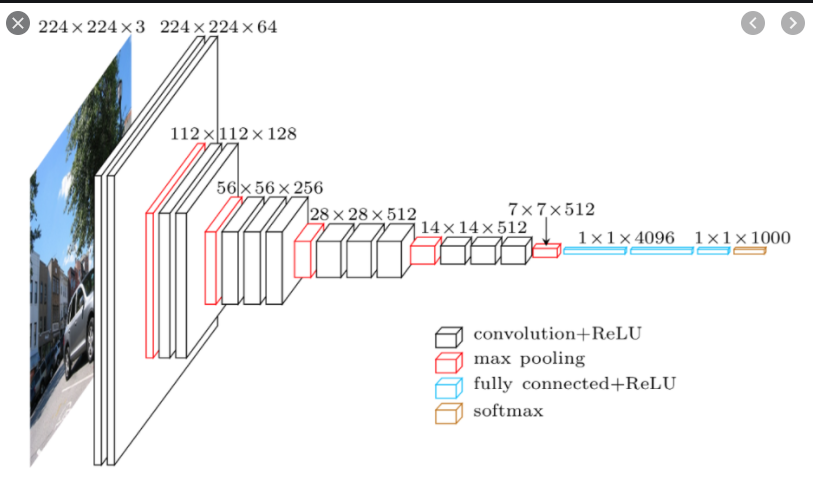

## convolution layer

텐서의 feature 추출!
*   filter -> element 곱 실시!
*   padding -> 원본데이터에 공간 추가 ->> 바깥에다가 0
*   stride  -> 2칸씩 이동해라
* 필터에 있는 가중치가 변하면서 학습

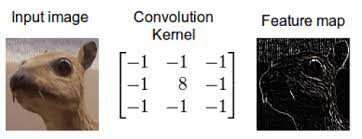

## Pooling layer

중요한것만 filter

weight 조정 불가
max pooling
큰값만 뽑아냄


feature map의 크기를 줄여 정답에 가깝게 만들어줌!

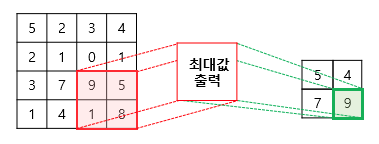

## dropout

오버피팅도 피할수있고 시간도줄ㅇ어들고 성능좋아질수있고 
CNN에서 특히 중요하다

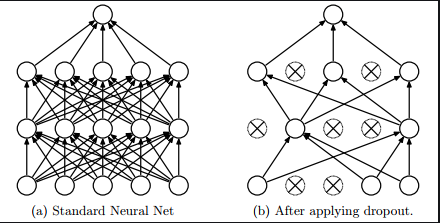

In [ ]:
import tensorflow as tf

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full = X_train_full.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train_full.shape, X_test.shape)

X_valid,X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#데이터 특성에 맞게 모델 구축
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),  #convd relu 무조건
  #케라스는 conv2d 무조건 3차원부터!! kenal size ->필터크기 , 서로다른 종류의 필터 몇개할건지. 입력값이랑 출력값이랑 크기를 똑같이 하겠다.
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'), #input shape 자동으로해서 안해도됨
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), #pooling 2,2로 max pooling !! 
  tf.keras.layers.Dropout(rate=0.5), #random 인지 확인 -> 절반을 날림
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'), #valid -> padding 없음
  tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Flatten(), #일자로 쭉 폄  #-----------------여기서부터 MLP
  tf.keras.layers.Dense(units=512, activation='relu'), #퍼셉트론 개수 아무거나 
  tf.keras.layers.Dropout(rate=0.5),
  tf.keras.layers.Dense(units=256, activation='relu'),
  tf.keras.layers.Dropout(rate=0.5), 
  tf.keras.layers.Dense(units=10, activation='softmax') #분류 10개 -> 
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

In [ ]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
 186/1719 [==>...........................] - ETA: 9:55 - loss: 1.0952 - accuracy: 0.5966

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
a = X_test[:3]
k = model.predict(a)
r = model.predict_classes(a)
k.round(2)

In [ ]:
r